## Test Classification (Sentiment Analysis) with keras and TFIDF Vectorizer 

In [1]:
from warnings import filterwarnings 
filterwarnings('ignore')

## Read the Datasetn 

\t -Tab 

In [2]:
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

## Preprocess the text

In [4]:
s = 'Hi All Welcome, to senitiment analysis class! ...'
s = s.lower()
s

'hi all welcome, to senitiment analysis class! ...'

In [5]:
import re 
pre = re.sub("[^a-z ]",'',s).strip()
pre

'hi all welcome to senitiment analysis class'

## Create a text preprocessing function 

In [6]:
def preprocess_text(st):
    st = st.lower()
    pre = re.sub("[^a-z ]",'', st).strip()
    return pre

In [7]:
preprocess_text('Welcome All! to ETLHive ! ...')

'welcome all to etlhive'

## Preprocess entire data in dataframe 

In [8]:
df['Review_pre'] = df['Review'].apply(preprocess_text)

In [9]:
df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


## Seperate X and Y 

In [10]:
X = df['Review_pre']
X

0                                   wow loved this place
1                                      crust is not good
2               not tasty and the texture was just nasty
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                              appetite instantly gone
997    overall i was not impressed and would not go back
998    the whole experience was underwhelming and i t...
999    then as if i hadnt wasted enough of my life th...
Name: Review_pre, Length: 1000, dtype: object

In [11]:
Y = df['Liked']
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

## Create a TFIDF vectorizer 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')
X_pre = tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Apply train test split 

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

## Create the simple neural network 

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [15]:
xtrain.shape[1]

1831

In [16]:
# Create the model
model = Sequential()

# Hidden Layer 1
model.add(Dense(256, activation='relu', input_dim=xtrain.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Hidden Layer 2
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Output layer (Binaray Classification - Sigmoid)
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [19]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=200, callbacks=[early_stop], batch_size=8)

Epoch 1/200


80/80 [==============================] - 5s 15ms/step - loss: 1.0087 - accuracy: 0.5234 - val_loss: 0.7160 - val_accuracy: 0.4437
Epoch 2/200
80/80 [==============================] - 1s 10ms/step - loss: 0.7442 - accuracy: 0.6484 - val_loss: 0.7301 - val_accuracy: 0.4437
Epoch 3/200
80/80 [==============================] - 1s 10ms/step - loss: 0.5826 - accuracy: 0.6984 - val_loss: 0.7154 - val_accuracy: 0.4625
Epoch 4/200
80/80 [==============================] - 1s 10ms/step - loss: 0.5146 - accuracy: 0.7719 - val_loss: 0.6885 - val_accuracy: 0.4875
Epoch 5/200
80/80 [==============================] - 1s 10ms/step - loss: 0.3717 - accuracy: 0.8469 - val_loss: 0.6170 - val_accuracy: 0.6375
Epoch 6/200
80/80 [==============================] - 1s 10ms/step - loss: 0.3137 - accuracy: 0.8719 - val_loss: 0.5835 - val_accuracy: 0.6625
Epoch 7/200
80/80 [==============================] - 1s 10ms/step - loss: 0.2845 - accuracy: 0.8781 - val_loss: 0.5643 - val_accuracy: 0.7188
Epoc

## Learning Curve 

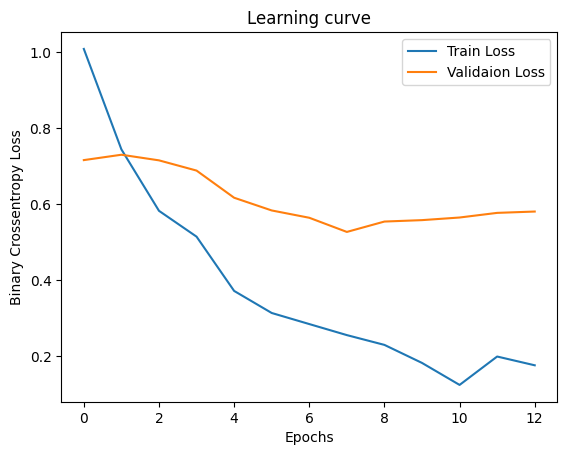

In [20]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validaion Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning curve')
plt.legend()
plt.show()

## Bigger Dataset size will avoide overfitting here 

In [21]:
model.evaluate(xtrain, ytrain)

25/25 [==============================] - 0s 3ms/step - loss: 0.1275 - accuracy: 0.9475


[0.12754161655902863, 0.9474999904632568]

In [22]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.7200


[0.6458260416984558, 0.7200000286102295]

## Predict results for train and test 

In [23]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

7/7 [==============================] - 0s 2ms/step


In [24]:
yprob_tr[0:5]

array([[9.8200023e-01],
       [9.9819016e-01],
       [9.9767131e-01],
       [2.8093875e-06],
       [4.9430564e-05]], dtype=float32)

In [25]:
yprob_ts[0:5]

array([[0.09882526],
       [0.00312317],
       [0.9528769 ],
       [0.9984621 ],
       [0.976743  ]], dtype=float32)

## Get the predictions for train and test 

In [26]:
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr]
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts]


In [27]:
ypred_tr[0:5]


[1, 1, 1, 0, 0]

In [28]:
ytrain[0:5]

108    1
134    1
585    1
42     0
990    0
Name: Liked, dtype: int64

In [29]:
ypred_ts[0:5]

[0, 0, 1, 1, 1]

In [30]:
ytest[0:5]

492    0
383    0
856    1
834    1
603    1
Name: Liked, dtype: int64

## Confusion Matrix 

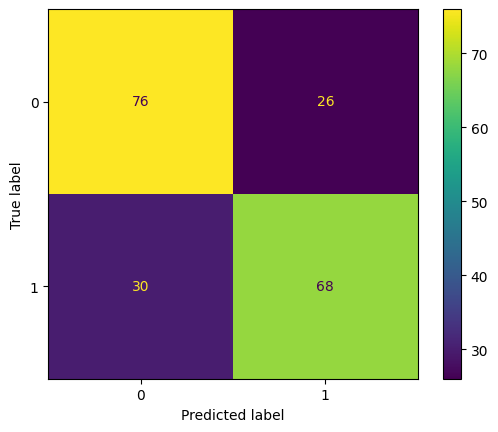

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

## Print Classification Report 

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       102
           1       0.72      0.69      0.71        98

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



# Save the model for future

In [33]:
model.save('Sentiment.keras')

## Predicting Own Statement based on model 

In [34]:
def predict_sentiment(st, tfidf, model):
    pre = preprocess_text(st)
    pre_tf = tfidf.transform([pre]).toarray()
    prob = model.predict(pre_tf)
    if prob>=0.5:
        print('Positive Review')
    else:
        print('Negtive Review')
    return prob

In [35]:
st = 'Wow Good restaurant!...'
predict_sentiment(st, tfidf, model)

1/1 [==============================] - 0s 405ms/step
Positive Review


array([[0.9864686]], dtype=float32)

In [36]:
st2 = 'I did not like the place, Ambience was very bad'
predict_sentiment(st2, tfidf, model)

1/1 [==============================] - 0s 28ms/step
Negtive Review


array([[0.00386765]], dtype=float32)